In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [15]:
claimant = pd.read_csv("C:\\Users\\Chetan Yewale\\Downloads\\claimants.csv")

In [16]:
claimant.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

In [17]:
claimant.head(4)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037


In [18]:
### Removing casenum column

In [19]:
claimant = claimant.drop(["CASENUM"],axis = 1)

In [20]:
claimant.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='CLMSEX', ylabel='CLMAGE'>

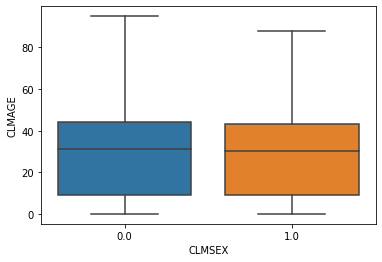

In [22]:
sns.boxplot(x = "CLMSEX", y= "CLMAGE", data = claimant)

{'whiskers': [<matplotlib.lines.Line2D at 0x218c991e408>,
 'caps': [<matplotlib.lines.Line2D at 0x218c991e348>,
 'boxes': [<matplotlib.lines.Line2D at 0x218c9919a88>],
 'medians': [<matplotlib.lines.Line2D at 0x218c98d5c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x218c991e548>],
 'means': []}

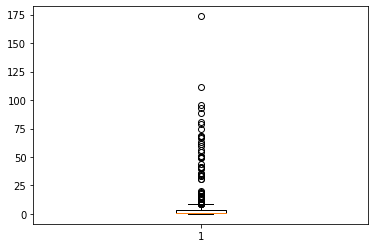

In [23]:
plt.boxplot(claimant.LOSS)

In [13]:
claimant = claimant.describe()

In [24]:
claimant.ATTORNEY.value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [25]:
claimant.ATTORNEY.value_counts().index[0]  ### giv u most ocuuring values

0

In [26]:
claimant.ATTORNEY.mode()

0    0
dtype: int64

In [27]:
claimant.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [28]:
claimant.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [70]:
#### filing the missing value with most ocurring no

In [29]:
claimant.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [30]:
claimant.iloc[:,0:4] = claimant.iloc[:,0:4].apply(lambda x:x.fillna(x.mode()[0]))

In [31]:
claimant.iloc[:,0:4]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT
0,0,0.0,1.0,0.0
1,1,1.0,0.0,0.0
2,1,0.0,1.0,0.0
3,0,0.0,1.0,1.0
4,1,0.0,1.0,0.0
...,...,...,...,...
1335,1,0.0,1.0,0.0
1336,0,1.0,1.0,0.0
1337,1,1.0,1.0,0.0
1338,0,1.0,0.0,0.0


In [32]:
claimant.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [75]:
claimant.iloc[:,0:4].columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT'], dtype='object')

In [33]:
claimant.CLMAGE = claimant.CLMAGE.fillna(claimant.CLMAGE.mean())

In [34]:
claimant.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [35]:
from scipy import stats

In [36]:
import scipy.stats as st

In [51]:
### Model building

In [37]:
st.chisqprob = lambda chisq, df: stats.chi2.sf(chisq.df)

In [38]:
st.chisqprob

<function __main__.<lambda>(chisq, df)>

In [39]:
 claimant.head(4)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037


In [41]:
import statsmodels.formula.api as sm

In [56]:
model_1 = sm.logit("ATTORNEY~CLMSEX+CLMAGE+CLMINSUR+SEATBELT+LOSS", data = claimant).fit()

Optimization terminated successfully.
         Current function value: 0.609131
         Iterations 7


In [57]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1209
Time:                        09:18:28   Log-Likelihood:                -816.24
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 1.620e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.226     -0.660      0.509      -0.592       0.294
CLMSEX         0.3204      0.120      2.674      0.008       0.086       0.555
CLMAGE         0.0066      0.003      2.058      0.040       0.000       0.013
CLMINSUR       0.5284      0.210      2.516      0.012       0.117       0.940
SEATBELT      -0.6718      0.522     -1.286      0.198      -1.696       0.352
LOSS          -0.3228      0.029    -10.962      0.000      -0.381      -0.265
==============================================================================
"""

In [58]:
pred_1 = model_1.predict(claimant)

In [59]:
claimant["pred_1"] = pred_1   ### creating column in claimant

In [60]:
claimant.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS',
       'pred_1', 'att_value', 'att_val'],
      dtype='object')

In [61]:
### filinng all the values in cell is zero

In [62]:
claimant["att_value"] = 0

In [63]:
claimant.loc[pred_1>0.5, "att_value"] = 1

In [65]:
claimant.att_value

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: att_value, Length: 1340, dtype: int64

In [66]:
from sklearn.metrics import classification_report

In [67]:
classification_report(claimant.att_value,claimant.ATTORNEY)

'              precision    recall  f1-score   support\n\n           0       0.64      0.74      0.69       587\n           1       0.77      0.67      0.72       753\n\n    accuracy                           0.70      1340\n   macro avg       0.70      0.71      0.70      1340\nweighted avg       0.71      0.70      0.70      1340\n'

In [68]:
### confusion matrics

In [69]:
pd.crosstab(claimant.ATTORNEY,claimant.att_value)

att_value,0,1
ATTORNEY,,
0,436,249
1,151,504


In [70]:
accuracy = (436 + 504)/(436+249+151+504) ### 70.14%

In [71]:
accuracy

0.7014925373134329

In [72]:
### ROC curve

In [73]:
from sklearn import metrics

In [74]:
##fpr = false positive rate  1-0 =151  false positive , 0-1 = 249 false negative     

In [78]:
## tpr = true positive rate  0-0 = 436 true negative , 1-1 = 504 true positive

In [81]:
fpr,tpr,threshold = metrics.roc_curve(claimant.ATTORNEY,pred_1)

In [82]:
### above function is used for binary classification only

TypeError: 'str' object is not callable

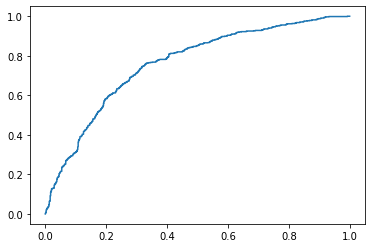

In [86]:
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Postive")

roc_auc = metrics.auc(fpr,tpr

In [87]:
roc_auc = metrics.auc(fpr,tpr) ## 76.01 ## area under ROC = auc

In [88]:
roc_auc

0.7601014097063576

In [89]:
#### dividing the data into train and test

In [90]:
claimant.drop("att_value",axis = 1,inplace =True) 

In [97]:
from sklearn.model_selection import train_test_split


In [99]:
train,test = train_test_split(claimant,test_size=0.3)

In [108]:
train.drop("att_val",axis =1,inplace = True)

KeyError: "['att_val'] not found in axis"

In [100]:
#### checking na values

In [110]:
train.isnull().sum(),test.isnull().sum()

(ATTORNEY    0
 CLMSEX      0
 CLMINSUR    0
 SEATBELT    0
 CLMAGE      0
 LOSS        0
 pred_1      0
 dtype: int64,
 ATTORNEY    0
 CLMSEX      0
 CLMINSUR    0
 SEATBELT    0
 CLMAGE      0
 LOSS        0
 pred_1      0
 dtype: int64)

KeyError: '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan\n nan nan nan nan nan nan nan nan nan nan nan] not found in axis'

In [109]:
test.drop("att_val",axis = 1,inplace =True)

In [111]:
## train model

In [112]:
train_model = sm.logit("ATTORNEY~CLMAGE+CLMSEX+LOSS+SEATBELT",data = train).fit()

Optimization terminated successfully.
         Current function value: 0.624194
         Iterations 8


In [113]:
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                  938
Model:                          Logit   Df Residuals:                      933
Method:                           MLE   Df Model:                            4
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                 0.09732
Time:                        10:09:45   Log-Likelihood:                -585.49
converged:                       True   LL-Null:                       -648.62
Covariance Type:            nonrobust   LLR p-value:                 2.472e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2063      0.157      1.313      0.189      -0.102       0.514
CLMAGE         0.0044      0.004      1.172      0.241      -0.003       0.012
CLMSEX         0.3361      0.140      2.399      0.016       0.062       0.611
LOSS          -0.2672      0.034     -7.924      0.000      -0.333      -0.201
SEATBELT      -0.5456      0.576     -0.947      0.343      -1.674       0.583
==============================================================================
"""

In [115]:
train_pred = train_model.predict(train.iloc[:,1:])

In [116]:
train_pred

806     0.467030
831     0.555729
1019    0.427960
780     0.413765
547     0.574261
          ...   
1016    0.232466
811     0.627699
674     0.315815
1320    0.627892
302     0.378107
Length: 938, dtype: float64

In [117]:
train["train_pred"] = np.zeros(938)

In [118]:
train.loc[train_pred>0.5,"train_pred"] = 1

In [119]:
### confusion matrix

In [120]:
confusion_matrix = pd.crosstab(train["ATTORNEY"],train.train_pred)

In [121]:
confusion_matrix

train_pred,0.0,1.0
ATTORNEY,,
0,311,185
1,103,339


In [122]:
accuracy_train = (311+339)/(311+185+103+339)

In [123]:
accuracy_train

0.6929637526652452

In [124]:
### prediction on test data

In [125]:
test_pred = train_model.predict(test)

In [126]:
test_pred

452     0.606833
563     0.514219
912     0.300198
603     0.443915
842     0.557035
          ...   
515     0.551657
1073    0.569014
549     0.638947
93      0.386135
1017    0.434420
Length: 402, dtype: float64

In [127]:
test["test_pred"] = np.zeros(402)

In [128]:
test.loc[test_pred>0.5, "test_pred"] =1

In [129]:
##confusion_matrix

In [130]:
confusion_test = pd.crosstab(test["ATTORNEY"],test.test_pred)

In [131]:
confusion_test

test_pred,0.0,1.0
ATTORNEY,,
0,131,58
1,43,170


In [132]:
accuracy_test = (131+170)/(131+58+43+170) ## 74.87%

In [133]:
accuracy_test

0.7487562189054726